In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import grina
import matplotlib.pyplot as plt

In [2]:
fpath = os.path.join("..", "data", "unicorn_company_invester.csv")
df = pd.read_csv(fpath, converters={"Select Investors": lambda x: x.split(",")})

In [3]:
df.head()

,Company,Valuation($B),Date Joined,Country,Industry,Select Investors
0,100credit,$1,4/18/2018,China,Fintech,"[Sequoia Capital China, China Reform Fund, H..."
1,17zuoye,$1,3/7/2018,China,Edtech,"[DST Global, Temasek Holdings]"
2,23andMe,$2.50,7/3/2015,United States,Health,"[Google Ventures, New Enterprise Associates, ..."
3,4Paradigm,$2,12/19/2018,China,Artificial intelligence,"[Sequoia Capital China, China Construction Ba..."
4,58 Daojia,$1,10/12/2015,China,Internet software & services,"[KKR, Alibaba Group, Ping An Insurance]"


In [4]:
r_comps, r_invests = [], []
for company, investors in df[["Company", "Select Investors"]].values.tolist():
    n_rows = len(investors)
    comps = np.full(n_rows, company)
    r_comps += comps.tolist()
    r_invests += investors

In [5]:
rdf = pd.DataFrame()
rdf["Company"] = np.array(r_comps)
rdf["Investors"] = np.array(r_invests)
rdf

,Company,Investors
0,100credit,Sequoia Capital China
1,100credit,China Reform Fund
2,100credit,Hillhouse Capital Management
3,17zuoye,DST Global
4,17zuoye,Temasek Holdings
...,...,...
1381,Zwift,True
1382,Zwift,Causeway Media Partners
1383,Zymergen,Data Collective
1384,Zymergen,True Ventures


In [6]:
B = nx.Graph()

In [7]:
B.add_nodes_from(rdf["Company"].unique().tolist(), bipartite=0)
B.add_nodes_from(rdf["Investors"].unique().tolist(), bipartite=1)

In [8]:
edges = [(comp, inve) for comp, inve in zip(rdf["Company"], rdf["Investors"])]
B.add_edges_from(edges)

In [9]:
from networkx.algorithms import bipartite
company_graph = bipartite.projected_graph(B, set(rdf["Company"].tolist()))
investor_graph = bipartite.projected_graph(B, set(rdf["Investors"].tolist()))

# 中心性
## 投資家のグラフ

In [10]:
degrees = nx.degree_centrality(investor_graph)
betweens = nx.betweenness_centrality(investor_graph)
eigens = nx.eigenvector_centrality(investor_graph)
closeness = nx.closeness_centrality(investor_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [11]:
investor_centrality_df = pd.DataFrame.from_dict(centra_dict)
investor_centrality_df

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
,0.004790,0.000000,2.620169e-02,0.159262
Google,0.005988,0.001305,2.269115e-02,0.164151
Institutional Venture Partners,0.019162,0.022605,9.625005e-02,0.203694
DN Capital,0.003593,0.000000,2.341049e-02,0.153740
Nexus Venture Partners,0.004790,0.004089,5.364067e-02,0.178407
...,...,...,...,...
Razorpay,0.001198,0.000000,1.796382e-13,0.009292
SentinelOne,0.001198,0.000000,1.796382e-13,0.009292
Freshworks,0.001198,0.000000,1.796382e-13,0.009292
TechStyle Fashion Group,0.001198,0.000000,1.796382e-13,0.009292


In [12]:
investor_centrality_df.sort_values(by="Degree Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Sequoia Capital,0.041916,0.064391,3.455255e-01,0.221164
Sequoia Capital China,0.041916,0.067022,1.768815e-01,0.215144
IDG Capital,0.032335,0.037174,1.057674e-01,0.187420
Kleiner Perkins Caufield & Byers,0.027545,0.032677,1.605568e-01,0.207412
Andreessen Horowitz,0.026347,0.053940,1.657555e-01,0.214005
...,...,...,...,...
Pacific Century Group,0.000000,0.000000,5.489192e-39,0.000000
N/A,0.000000,0.000000,5.489192e-39,0.000000
ICG,0.000000,0.000000,5.489192e-39,0.000000
Iconiq Capital,0.000000,0.000000,5.489192e-39,0.000000


Sequoia Capitalが最も他の投資家と一緒にユニコーン企業に投資を行っている。

In [13]:
investor_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Sequoia Capital China,0.041916,0.067022,1.768815e-01,0.215144
Sequoia Capital,0.041916,0.064391,3.455255e-01,0.221164
Andreessen Horowitz,0.026347,0.053940,1.657555e-01,0.214005
Goldman Sachs,0.025150,0.046641,1.155754e-01,0.208842
IDG Capital,0.032335,0.037174,1.057674e-01,0.187420
...,...,...,...,...
Northern Light Venture Capital,0.002395,0.000000,9.424583e-03,0.149812
Haitong Leading Capital Management,0.002395,0.000000,2.471695e-21,0.002395
China Creation Ventures,0.002395,0.000000,2.471695e-21,0.002395
Tus Holdings,0.002395,0.000000,1.319847e-02,0.150183


Sequoia Capital Chainaが最も媒介性が高かった。他の投資家同士を繋げることができるという解釈？

In [14]:
investor_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Sequoia Capital,0.041916,0.064391,3.455255e-01,0.221164
Sequoia Capital China,0.041916,0.067022,1.768815e-01,0.215144
Andreessen Horowitz,0.026347,0.053940,1.657555e-01,0.214005
General Catalyst,0.019162,0.032122,1.372923e-01,0.211269
Andreessen Horowitz,0.022754,0.032861,2.098339e-01,0.210170
...,...,...,...,...
ICG,0.000000,0.000000,5.489192e-39,0.000000
EQT Partners,0.000000,0.000000,5.489192e-39,0.000000
Iconiq Capital,0.000000,0.000000,5.489192e-39,0.000000
CDIB Capital,0.000000,0.000000,5.489192e-39,0.000000


## 企業のネットワーク


In [15]:
degrees = nx.degree_centrality(company_graph)
betweens = nx.betweenness_centrality(company_graph)
eigens = nx.eigenvector_centrality(company_graph)
closeness = nx.closeness_centrality(company_graph)
centra_dict = {
    "Degree Centrality": degrees,
    "Betweenness Centrality": betweens,
    "Eigen Centrality": eigens,
    "Closeness Centrality": closeness
}

In [16]:
company_centrality_df = pd.DataFrame.from_dict(centra_dict)
company_centrality_df

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Attentive Mobile,0.035225,0.002978,1.572233e-02,0.253751
Wildlife Studios,0.015656,0.003739,6.146332e-03,0.238236
GPclub,0.007828,0.000000,9.473446e-05,0.166177
Jusfoun Big Data,0.027397,0.000000,4.366273e-02,0.214896
SoFi,0.021526,0.006232,2.040050e-02,0.248637
...,...,...,...,...
Diamler,0.001957,0.000000,1.425025e-04,0.182907
TMT Investments,0.001957,0.000000,1.425025e-04,0.182907
Softbank Group,0.001957,0.000000,2.985906e-67,0.003523
GGV Capital,0.001957,0.000000,2.985906e-67,0.003523


In [17]:
company_centrality_df.sort_values(by="Degree Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Pony.ai,0.070450,0.019761,2.350748e-01,0.262059
Rappi,0.062622,0.024574,2.618463e-02,0.284464
Ziroom,0.062622,0.035399,2.107475e-01,0.276754
Luoji Siwei,0.060665,0.006916,2.364358e-01,0.261596
Miaoshou Doctor,0.060665,0.006916,2.364358e-01,0.261596
...,...,...,...,...
Quanergy Systems,0.000000,0.000000,1.896745e-99,0.000000
Numbrs,0.000000,0.000000,1.896745e-99,0.000000
Vista Global,0.000000,0.000000,1.896745e-99,0.000000
Talkdesk,0.000000,0.000000,1.896745e-99,0.000000


In [18]:
company_centrality_df.sort_values(by="Betweenness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Ziroom,0.062622,0.035399,2.107475e-01,0.276754
Klook,0.060665,0.024608,2.151620e-01,0.271179
Rappi,0.062622,0.024574,2.618463e-02,0.284464
Pony.ai,0.070450,0.019761,2.350748e-01,0.262059
ZocDoc,0.043053,0.019746,2.563529e-02,0.274192
...,...,...,...,...
Intarcia Therapeutics,0.017613,0.000000,4.480923e-03,0.226570
Quanergy Systems,0.000000,0.000000,1.896745e-99,0.000000
Hike,0.005871,0.000000,1.160630e-03,0.188857
Illumio,0.001957,0.000000,1.664735e-04,0.177216


In [19]:
company_centrality_df.sort_values(by="Closeness Centrality", ascending=False)

,Degree Centrality,Betweenness Centrality,Eigen Centrality,Closeness Centrality
Rappi,0.062622,0.024574,2.618463e-02,0.284464
Confluent,0.052838,0.016496,2.275292e-02,0.281758
DoorDash,0.052838,0.014699,1.905271e-02,0.277013
Ziroom,0.062622,0.035399,2.107475e-01,0.276754
ZocDoc,0.043053,0.019746,2.563529e-02,0.274192
...,...,...,...,...
Zeta Global,0.000000,0.000000,1.896745e-99,0.000000
BrewDog,0.000000,0.000000,1.896745e-99,0.000000
You & Mr Jones,0.000000,0.000000,1.896745e-99,0.000000
INFI,0.000000,0.000000,1.896745e-99,0.000000


## 企業メモ
* Pony.aiは自動運転自動車の会社
* Ziroomは賃貸掲載サイトの運営会社（スーモやホームズみたいなサイトの中国版？）
* Rappiはコロンビアの会社で、買い物代行。Uber eatに近いサービスだと思う。

# コンポーネント

In [20]:
n_comps = nx.number_connected_components(investor_graph)
print("コンポーネント数: {}".format(n_comps))
print("ノード数に対するコンポーネント数の割合: {0:.2%}".format(n_comps / len(investor_graph)))

コンポーネント数: 112
ノード数に対するコンポーネント数の割合: 13.40%


In [21]:
S = [investor_graph.subgraph(c).copy() for c in nx.connected_components(investor_graph)]

投資家コンポーネント上位10件のサイズ
[552  16   9   5   5   4   3   3   3   3]


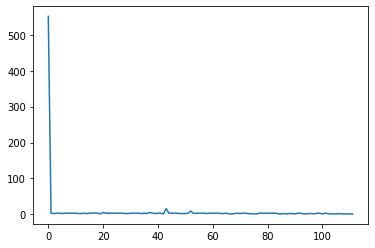

In [22]:
comp_sizes = [len(s) for s in S]
print("投資家コンポーネント上位10件のサイズ")
print(np.sort(comp_sizes)[::-1][:10])
plt.plot(comp_sizes)

投資家の大きな集団が存在する。

In [23]:
print("ネットワーク密度: {0:.2%}".format(nx.density(S[0])))

ネットワーク密度: 0.71%


ネットワーク密度は1%に満たない。

# データの出力

In [25]:
investor_centrality_df.to_csv(os.path.join("..", "out", "investor_centrality.csv"))
company_centrality_df.to_csv(os.path.join("..", "out", "company_centrality.csv"))


In [30]:
pd.DataFrame(S[0].nodes).to_csv(os.path.join("..", "out", "largest_investor_component.csv"), index=False, header=False)